In [1]:
import numpy as np
import seaborn as sb
import pandas as pd

In [2]:
df = pd.read_excel('crop_yield_prediction.xlsx')

In [3]:
df.head()

,S.No,Crop,District,Year,Min Temp,Max. Temp,Total Rainfall,Total Yield
0,1,bengal gram,ADILABAD,2016,12.34,42.66,1130.150000,1551
1,10,bengal gram,BHADRADRI,2016,16.42,42.65,1145.008696,0
2,19,bengal gram,HYDERABAD,2016,17.52,41.88,885.481250,0
3,28,bengal gram,JAGTIAL,2016,12.84,43.34,960.355556,1299
4,37,bengal gram,JANGAON,2016,15.99,41.87,978.676923,1299


In [4]:
df["Crop"].unique()

array(['bengal gram', 'groundnut', 'maize'], dtype=object)

In [5]:
df["District"].unique()

array(['ADILABAD', 'BHADRADRI', 'HYDERABAD', 'JAGTIAL', 'JANGAON',
       'JAYASHANKAR', 'JOGULAMBA', 'KAMAREDDY', 'KARIMNAGAR', 'KHAMMAM',
       'KOMARAM BHEEM', 'MAHABUBABAD', 'MAHABUBNAGAR', 'MANCHERIAL',
       'MEDAK', 'MEDCHAL MALKAJG', 'NAGARKURNOOL', 'NALGONDA', 'NIRMAL',
       'NIZAMABAD', 'PEDDAPALLI', 'RAJANNA', 'RANGAREDDY', 'SANGAREDDY',
       'SIDDIPET', 'SURYAPET', 'VIKARABAD', 'WANAPARTHY',
       'WARANGAL RURAL', 'WARANGAL URBAN', 'YADADRI'], dtype=object)

In [6]:
df["Year"].unique()

array([2016, 2017, 2018], dtype=int64)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   S.No            279 non-null    int64  
 1   Crop            279 non-null    object 
 2   District        279 non-null    object 
 3   Year            279 non-null    int64  
 4   Min Temp        279 non-null    float64
 5   Max. Temp       279 non-null    float64
 6   Total Rainfall  279 non-null    float64
 7   Total Yield     279 non-null    int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 17.6+ KB


In [8]:
df.isnull().sum()

S.No              0
Crop              0
District          0
Year              0
Min Temp          0
Max. Temp         0
Total Rainfall    0
Total Yield       0
dtype: int64

In [9]:
df.shape

(279, 8)

<AxesSubplot: >

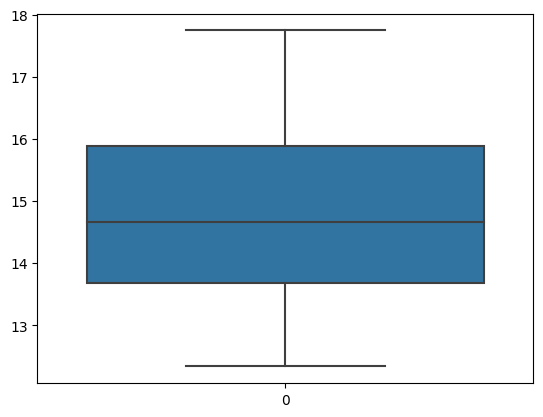

In [10]:
sb.boxplot(df['Min Temp'])

<AxesSubplot: >

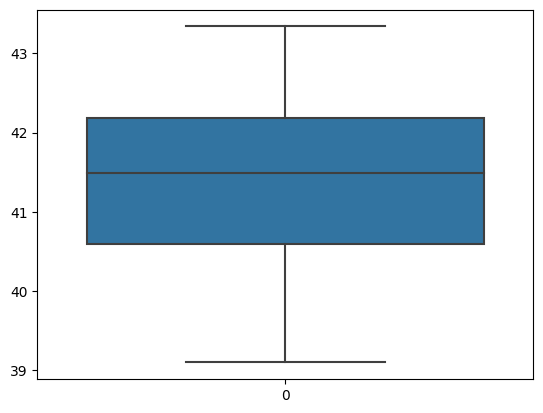

In [11]:
sb.boxplot(df['Max. Temp'])

<AxesSubplot: >

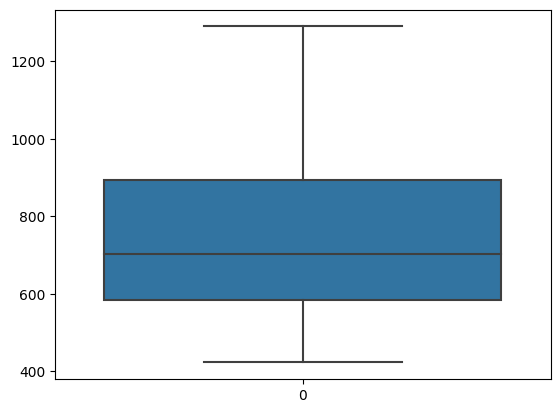

In [12]:
sb.boxplot(df['Total Rainfall'])

<AxesSubplot: >

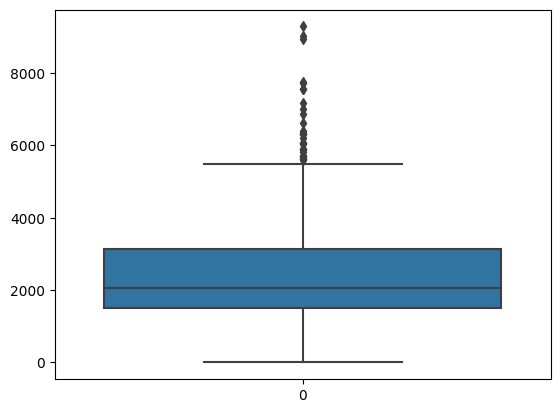

In [13]:
sb.boxplot(df['Total Yield'])

# Removing outliers of minimum temperature

In [14]:
Q1 = np.percentile(df["Min Temp"],25,interpolation="midpoint")
Q3 = np.percentile(df["Min Temp"],75,interpolation="midpoint")
IQR = Q3-Q1

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8536\2275980713.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df["Min Temp"],25,interpolation="midpoint")
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8536\2275980713.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df["Min Temp"],75,interpolation="midpoint")


In [15]:
upper = np.where(df['Min Temp'] >= (Q3+1.5*IQR))
lower = np.where(df['Min Temp'] <= (Q1-1.5*IQR))

In [16]:
print("old shape : ", df.shape)

old shape :  (279, 8)


In [17]:
df.drop(upper[0],inplace=True)
df.drop(lower[0],inplace=True)
print("new shape : ", df.shape)

new shape :  (279, 8)


# Removing outliers of maximum temperature

In [18]:
Q1 = np.percentile(df["Max. Temp"],25,interpolation="midpoint")
Q3 = np.percentile(df["Max. Temp"],75,interpolation="midpoint")
IQR = Q3-Q1

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8536\4224182228.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df["Max. Temp"],25,interpolation="midpoint")
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8536\4224182228.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df["Max. Temp"],75,interpolation="midpoint")


In [19]:
upper = np.where(df['Max. Temp'] >= (Q3+1.5*IQR))
lower = np.where(df['Max. Temp'] <= (Q1-1.5*IQR))

In [20]:
print("old shape : ", df.shape)

old shape :  (279, 8)


In [21]:
df.drop(upper[0],inplace=True)
df.drop(lower[0],inplace=True)
print("new shape : ", df.shape)

new shape :  (279, 8)


# Removing outliers of total rainfall

In [22]:
Q1 = np.percentile(df["Total Rainfall"],25,interpolation="midpoint")
Q3 = np.percentile(df["Total Rainfall"],75,interpolation="midpoint")
IQR = Q3-Q1

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8536\668819811.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df["Total Rainfall"],25,interpolation="midpoint")
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8536\668819811.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df["Total Rainfall"],75,interpolation="midpoint")


In [23]:
upper = np.where(df['Total Rainfall'] >= (Q3+1.5*IQR))
lower = np.where(df['Total Rainfall'] <= (Q1-1.5*IQR))

In [24]:
print("old shape : ", df.shape)

old shape :  (279, 8)


In [25]:
df.drop(upper[0],inplace=True)
df.drop(lower[0],inplace=True)
print("new shape : ", df.shape)

new shape :  (279, 8)


# Graphical Analysis 

In [26]:
df.columns

Index(['S.No', 'Crop', 'District', 'Year', 'Min Temp', 'Max. Temp',
       'Total Rainfall', 'Total Yield'],
      dtype='object')

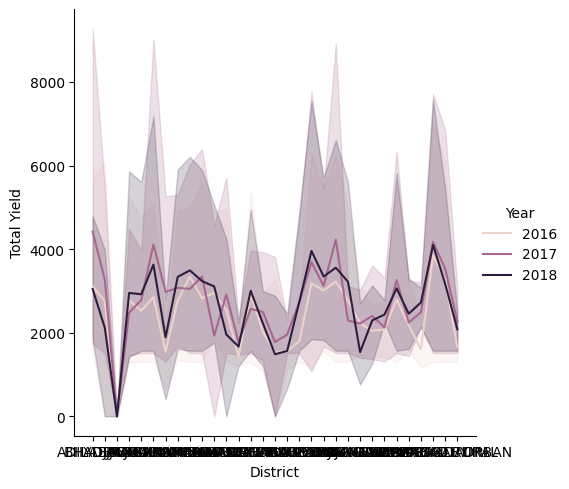

In [27]:
sb.relplot(data = df,x="District",y="Total Yield",hue="Year",kind="line")

In [28]:
dist = (df['Crop'])
dist = set(dist)
dist = list(dist)
dist = {dist[i] : i for i  in range(0,len(dist))}
df["Crop"] = df["Crop"].map(dist)

In [29]:
dist = (df['District'])
dist = set(dist)
dist = list(dist)
dist = {dist[i] : i for i  in range(0,len(dist))}
df["District"] = df["District"].map(dist)

In [30]:
df.head()

,S.No,Crop,District,Year,Min Temp,Max. Temp,Total Rainfall,Total Yield
0,1,2,30,2016,12.34,42.66,1130.150000,1551
1,10,2,12,2016,16.42,42.65,1145.008696,0
2,19,2,16,2016,17.52,41.88,885.481250,0
3,28,2,17,2016,12.84,43.34,960.355556,1299
4,37,2,15,2016,15.99,41.87,978.676923,1299


In [31]:
import matplotlib.pyplot as plt

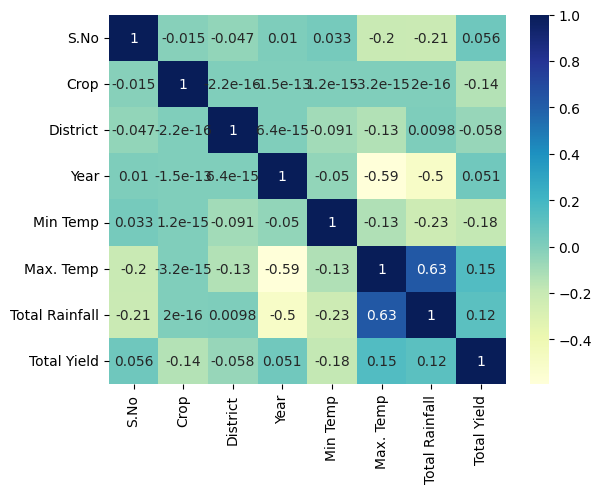

In [32]:
sb.heatmap(df.corr(),cmap="YlGnBu",annot=True)
plt.show()

# Splitting training set and testing set

In [33]:
df.columns

Index(['S.No', 'Crop', 'District', 'Year', 'Min Temp', 'Max. Temp',
       'Total Rainfall', 'Total Yield'],
      dtype='object')

In [34]:
features = df[['Crop','District','Year','Min Temp','Max. Temp','Total Rainfall']]
labels = df['Total Yield']

# Random Forest Regressor model

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,labels,test_size=0.2,random_state=2)

from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.datasets import make_regression

model2 = RandomForestRegressor(max_depth=1000,random_state=0)
model2.fit(x_train,y_train)

RandomForestRegressor(max_depth=1000, random_state=0)

In [36]:
y_pred = model2.predict(x_test)

In [37]:
df2 = pd.DataFrame({'Actual':y_test,'Prediction':y_pred})
df2.head()

,Actual,Prediction
155,2489,2345.18
7,1340,1282.21
99,2025,1977.57
13,1299,1248.64
112,2044,2052.71


In [38]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7413422958871119

In [39]:
user_input = pd.DataFrame({
    'Crop':2,
    'District':27,
    'Year':2018,
    'Min Temp':12.46,
    'Max. Temp':41.66,
    'Total Rainfall':884.291806,
},index=[0])
model2.predict(user_input)

array([1760.67])

In [40]:
user_input = [[2,27,2018,12.46,41.66,884.291]]
model2.predict(user_input)

C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([1760.67])

# Export ML model

In [72]:
#from joblib import dump
#dump(model2, 'crop_yield_prediction.json')

# Linear Regression model

In [42]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [43]:
y_pred = model.predict(x_test)

In [44]:
df2 = pd.DataFrame({'Actual':y_test,'Prediction':y_pred})
df2.head()

,Actual,Prediction
155,2489,4206.909484
7,1340,2784.665399
99,2025,2681.127288
13,1299,2907.097446
112,2044,3725.028670


In [45]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

-0.24720285934999553

# Decision Tree Regressor

In [46]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

model = DecisionTreeRegressor()
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [47]:
y_pred = model.predict(x_test)

In [48]:
df2 = pd.DataFrame({'Actual':y_test,'Prediction':y_pred})
df2.head()

,Actual,Prediction
155,2489,2504.0
7,1340,1516.0
99,2025,2186.0
13,1299,1299.0
112,2044,2068.0


In [49]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1697854.8214285714


In [50]:

r2_score(y_test,y_pred)

0.007937683209434443

# Support Vector Machine

In [51]:
from sklearn.svm import SVR
model = SVR(kernel='linear')
model.fit(x_train,y_train)

SVR(kernel='linear')

In [52]:
y_pred = model.predict(x_test)

In [53]:
y_test

155    2489
7      1340
99     2025
13     1299
112    2044
89     2140
93     2068
66     1569
163    2700
175    2489
171    2455
208    3132
29     1299
77     1569
127    1453
3      1299
201    3293
35     1516
189    5251
141    1932
133    2126
140    2300
246    6851
101    2411
118    1429
11     1299
113    2068
233    2052
128    1769
153    2230
65     1569
30     1299
53     1403
214    6999
151    2141
144    2236
74     1569
84     1138
10     1881
183    3167
173    2489
156    2370
98     2151
131    2236
209    2666
23     1421
120    2330
247    3068
212    3231
85     1268
115    2068
268    6612
134       0
239    2238
160    2141
54     1366
Name: Total Yield, dtype: int64

In [66]:
y_pred

array([2050.5923, 1311.6554, 2019.9542, 1335.4082, 2421.5208, 1900.9513,
       2328.281 , 1613.6544, 2005.3601, 3724.8286, 1872.1166, 2166.6003,
       1263.67  , 1733.1089, 1644.2871, 1353.3258, 3575.1177, 1493.3824,
       4893.44  , 1880.9623, 2522.995 , 2116.7578, 5936.6006, 2609.3657,
        739.1521, 1013.7353, 2399.86  ,  721.7162, 2044.2192, 2414.067 ,
       1418.3344, 1065.3973, 1769.514 , 5652.3076, 2525.7751, 3958.2214,
        675.7772, 1465.3273, 1598.8417, 3379.256 , 2239.685 , 1985.5225,
       1926.3755, 2309.3613, 3879.6145, 1595.0795, 2032.2963, 5133.886 ,
       4413.5503, 2089.7766, 2227.4976, 7612.1826, 2081.5422, 2457.246 ,
       2047.5416, 1969.6797], dtype=float32)

In [54]:
df2 = pd.DataFrame({'Actual':y_test,'Prediction':y_pred})
df2.head()

,Actual,Prediction
155,2489,2149.029135
7,1340,1910.977884
99,2025,1885.107886
13,1299,1870.181243
112,2044,2052.321586


In [55]:
r2_score(y_test,y_pred)

-0.056734007001398634

# Aritificial Neural Networks

In [56]:
from keras.models import Sequential
from keras.layers import Dense

In [67]:
# Initializing the model
#model = Sequential()

# Adding the first hidden layer
#model.add(Dense(units=128, activation='relu', input_dim=x_train.shape[1]))

# Adding the second hidden layer
#model.add(Dense(units=64, activation='relu'))

# Adding the output layer
#model.add(Dense(units=1, activation='sigmoid'))

# Compiling the model
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
#model.fit(x_train, y_train, epochs=50, batch_size=32)

In [68]:
#y_pred = model.predict(x_test)

In [69]:
#r2_score(y_test,y_pred)

# LSTM

In [60]:
from keras.layers import LSTM, Dense

In [70]:
# Initializing the model
#model = Sequential()

# Adding the LSTM layer
#model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))

# Adding the output layer
#model.add(Dense(units=1, activation='sigmoid'))

# Compiling the model
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
#model.fit(x_train, y_train, epochs=50, batch_size=32)

In [71]:
#y_pred = model.predict(x_test)

# XGBoost Regressor

In [63]:
from xgboost import XGBRegressor

In [64]:
# Train the XGBoost model
model = XGBRegressor()
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print("R^2 Score: ", r2)

R^2 Score:  0.7100920891894602
